# BÀI TẬP VỀ NHÀ:

1. Ở bài tập về nhà số 11, bạn đã làm quen với bài toán phân loại cảm xúc trên bộ dữ liệu FER-2013 sử dụng phương pháp trích xuất đặc trưng BoW kết hợp với mô hình phân loại SVM, Random forest, KNN. Trong bài tập này, bạn hãy thử sử dụng mạng LeNet và BKNet ở trên để huấn luyện mô hình nhận diện cảm xúc.


In [1]:
from google.colab import drive
drive.mount('/content/drive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
cd drive/'My Drive'/'Colab Notebooks'/L12

/content/drive/My Drive/Colab Notebooks/L12


In [3]:
import warnings
warnings.filterwarnings("ignore")
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pickle
import sklearn
import pandas as pd
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import keras
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D, ZeroPadding2D
from keras.layers.normalization import BatchNormalization
from keras.regularizers import l2

Using TensorFlow backend.


In [4]:
def one_hot(idx):
    y=np.zeros(7)
    y[idx]=1
    return y
data = pd.read_csv(os.path.join('Dataset','fer2013.csv'),delimiter=',',dtype='a')
Y = np.array([one_hot(int(idx)) for idx in data['emotion']])
print(Y.shape)                                            
imagebuffer=np.array(data['pixels'])
print(imagebuffer.shape)

(35887, 7)
(35887,)


In [5]:
print(imagebuffer[0])

70 80 82 72 58 58 60 63 54 58 60 48 89 115 121 119 115 110 98 91 84 84 90 99 110 126 143 153 158 171 169 172 169 165 129 110 113 107 95 79 66 62 56 57 61 52 43 41 65 61 58 57 56 69 75 70 65 56 54 105 146 154 151 151 155 155 150 147 147 148 152 158 164 172 177 182 186 189 188 190 188 180 167 116 95 103 97 77 72 62 55 58 54 56 52 44 50 43 54 64 63 71 68 64 52 66 119 156 161 164 163 164 167 168 170 174 175 176 178 179 183 187 190 195 197 198 197 198 195 191 190 145 86 100 90 65 57 60 54 51 41 49 56 47 38 44 63 55 46 52 54 55 83 138 157 158 165 168 172 171 173 176 179 179 180 182 185 187 189 189 192 197 200 199 196 198 200 198 197 177 91 87 96 58 58 59 51 42 37 41 47 45 37 35 36 30 41 47 59 94 141 159 161 161 164 170 171 172 176 178 179 182 183 183 187 189 192 192 194 195 200 200 199 199 200 201 197 193 111 71 108 69 55 61 51 42 43 56 54 44 24 29 31 45 61 72 100 136 150 159 163 162 163 170 172 171 174 177 177 180 187 186 187 189 192 192 194 195 196 197 199 200 201 200 197 201 137 58 98 92 

In [6]:
X = np.array([np.fromstring(image,np.uint8,sep=' ').reshape((48,48,1)) for image in imagebuffer])
del imagebuffer
print(X.shape)

(35887, 48, 48, 1)


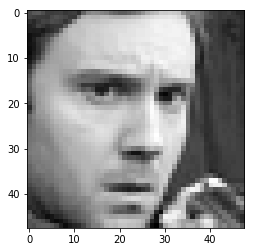

In [7]:
plt.imshow(X[0].reshape((48,48)),cmap='gray')

In [0]:
from keras.layers import Input
from keras.models import Model

def LeNet_Model(img_shape=(48,48,1), num_classes=5, weight_decay=1e-3):
    # Input layer
    input = Input(img_shape)
    
    # Layer 1
    x = Conv2D(filters=6, kernel_size=5, strides=1, padding='valid', kernel_regularizer=l2(weight_decay),
                     activation='relu')(input)
    x = MaxPooling2D(pool_size=2, strides=2)(x)

    # Layer 2
    x = Conv2D(filters=16, kernel_size=5, strides=1, padding='valid', kernel_regularizer=l2(weight_decay),
               activation='relu')(x)
    x = MaxPooling2D(pool_size=2, strides=2)(x)
    
    # Layer 3
    x = Flatten()(x)
    
    x = Dense(units=120, activation='relu', kernel_regularizer=l2(weight_decay))(x)
    
    # Layer 4
    x = Dense(units=84, activation='relu', kernel_regularizer=l2(weight_decay))(x)
    
    # Layer 5
    output = Dense(units=num_classes, activation='softmax')(x)

    lenet = Model(inputs=input, outputs=output)
    
    return lenet

In [9]:
LeNet_Model().summary()

W0630 19:19:16.883364 140019127216000 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0630 19:19:16.917534 140019127216000 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0630 19:19:16.924304 140019127216000 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0630 19:19:16.956554 140019127216000 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 48, 48, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 44, 44, 6)         156       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 22, 22, 6)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 18, 18, 16)        2416      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 9, 9, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1296)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 120)               155640    
__________

In [0]:
def BKNet(img_shape=(48,48), num_classes=5, weight_decay=1e-4):
    #### YOUR CODE HERE ####
    
    # Input layer
    input = Input(img_shape)
    
    # Layer 1
    x = Conv2D(filters=32, kernel_size=3, strides=1, padding='same', kernel_regularizer=l2(weight_decay),
                     activation='relu')(input)
    x = Conv2D(filters=32, kernel_size=3, strides=1, padding='same', kernel_regularizer=l2(weight_decay),
                     activation='relu')(x)
    x = MaxPooling2D(pool_size=2, strides=2, padding='same')(x)

    # Layer 2
    x = Conv2D(filters=64, kernel_size=3, strides=1, padding='same', kernel_regularizer=l2(weight_decay),
               activation='relu')(x)
    x = Conv2D(filters=64, kernel_size=3, strides=1, padding='same', kernel_regularizer=l2(weight_decay),
               activation='relu')(x)
    x = MaxPooling2D(pool_size=2, strides=2, padding='same')(x)
    
    # Layer 3
    x = Conv2D(filters=128, kernel_size=3, strides=1, padding='same', kernel_regularizer=l2(weight_decay),
               activation='relu')(x)
    x = Conv2D(filters=128, kernel_size=3, strides=1, padding='same', kernel_regularizer=l2(weight_decay),
               activation='relu')(x)
    x = MaxPooling2D(pool_size=2, strides=2, padding='same')(x)
    
    # Layer 4
    x = Conv2D(filters=256, kernel_size=3, strides=1, padding='same', kernel_regularizer=l2(weight_decay),
               activation='relu')(x)
    x = Conv2D(filters=256, kernel_size=3, strides=1, padding='same', kernel_regularizer=l2(weight_decay),
               activation='relu')(x)
    x = Conv2D(filters=256, kernel_size=3, strides=1, padding='same', kernel_regularizer=l2(weight_decay),
               activation='relu')(x)
    x = MaxPooling2D(pool_size=2, strides=2, padding='same')(x)
    
    # Layer 5
    x = Flatten()(x)
    x = Dense(units=256, activation='relu', kernel_regularizer=l2(weight_decay))(x)
    x = Dense(units=256, activation='relu', kernel_regularizer=l2(weight_decay))(x)
    
    # Layer 5
    output = Dense(units=num_classes, activation='softmax')(x)

    BKNet = Model(inputs=input, outputs=output)
    
    return BKNet

In [25]:
BKNet(img_shape=(96, 96, 3), num_classes=5, weight_decay=1e-4).summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         (None, 96, 96, 3)         0         
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 96, 96, 32)        896       
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 96, 96, 32)        9248      
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_45 (Conv2D)           (None, 48, 48, 64)        18496     
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 48, 48, 64)        36928     
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 24, 24, 64)        0         
__________

In [12]:
x_train=X[:28709]/255
y_train=Y[:28709]
x_val=X[28709:32298]/255
y_val=Y[28709:32298]
x_test=X[32298:]/255
y_test=Y[32298:]

print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)
print(x_test.shape)
print(y_test.shape)

(28709, 48, 48, 1)
(28709, 7)
(3589, 48, 48, 1)
(3589, 7)
(3589, 48, 48, 1)
(3589, 7)


# LeNet

In [14]:
LeNet = LeNet_Model(img_shape=(48, 48,1), num_classes=7)

from keras.callbacks import ModelCheckpoint,ReduceLROnPlateau

model_checkpoint=ModelCheckpoint('ferc2013_lenet.hdf5',monitor='val_acc',save_best_only=True)
reduce_lr=ReduceLROnPlateau(monitor='loss', factor=0.1, patience=10,verbose=1)

LeNet.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

LeNet.fit(x_train,y_train,epochs=200,validation_data=(x_val,y_val),batch_size=256,callbacks=[model_checkpoint,reduce_lr])

Train on 28709 samples, validate on 3589 samples
Epoch 1/200
28709/28709 [==============================] - 2s 56us/step - loss: 1.9276 - acc: 0.2790 - val_loss: 1.7412 - val_acc: 0.3578
Epoch 2/200
28709/28709 [==============================] - 1s 37us/step - loss: 1.6930 - acc: 0.3769 - val_loss: 1.6423 - val_acc: 0.3937
Epoch 3/200
28709/28709 [==============================] - 1s 37us/step - loss: 1.6114 - acc: 0.4062 - val_loss: 1.5873 - val_acc: 0.3990
Epoch 4/200
28709/28709 [==============================] - 1s 37us/step - loss: 1.5681 - acc: 0.4254 - val_loss: 1.5387 - val_acc: 0.4372
Epoch 5/200
28709/28709 [==============================] - 1s 37us/step - loss: 1.5313 - acc: 0.4370 - val_loss: 1.5229 - val_acc: 0.4542
Epoch 6/200
28709/28709 [==============================] - 1s 37us/step - loss: 1.4971 - acc: 0.4549 - val_loss: 1.4893 - val_acc: 0.4558
Epoch 7/200
28709/28709 [==============================] - 1s 37us/step - loss: 1.4709 - acc: 0.4664 - val_loss: 1.4818 - v

In [15]:
LeNet.evaluate(x_test, y_test)

3589/3589 [==============================] - 0s 81us/step


[3.9600266663601023, 0.4856505990609647]

## Best LeNet model

In [18]:
from keras.models import load_model
best_lenet = load_model('ferc2013_lenet.hdf5')
best_lenet.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 48, 48, 1)         0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 44, 44, 6)         156       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 22, 22, 6)         0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 18, 18, 16)        2416      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 9, 9, 16)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 1296)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 120)               155640    
__________

Đánh giá độ chính xác trên public và private test

In [19]:
best_lenet.evaluate(x_val,y_val)

3589/3589 [==============================] - 0s 121us/step


[1.4713600456100149, 0.5185288381247708]

In [20]:
best_lenet.evaluate(x_test,y_test)

3589/3589 [==============================] - 0s 81us/step


[1.491918858992884, 0.4993034271426306]

# BKNet

In [29]:
bknet=BKNet(img_shape=(48, 48,1), num_classes=7)

model_checkpoint=ModelCheckpoint('ferc2013_bknet.hdf5',monitor='val_acc',save_best_only=True)
reduce_lr=ReduceLROnPlateau(monitor='loss', factor=0.1, patience=10,verbose=1)

bknet.compile(optimizer=keras.optimizers.SGD(lr=0.1), loss='categorical_crossentropy', metrics=['accuracy'])

bknet.fit(x_train,y_train,epochs=200,validation_data=(x_val,y_val),batch_size=256,callbacks=[model_checkpoint,reduce_lr])

Train on 28709 samples, validate on 3589 samples
Epoch 1/200
28709/28709 [==============================] - 10s 331us/step - loss: 2.0050 - acc: 0.2513 - val_loss: 1.9949 - val_acc: 0.2494
Epoch 2/200
28709/28709 [==============================] - 8s 269us/step - loss: 1.9828 - acc: 0.2513 - val_loss: 2.0004 - val_acc: 0.1842
Epoch 3/200
28709/28709 [==============================] - 8s 269us/step - loss: 1.9741 - acc: 0.2508 - val_loss: 1.9791 - val_acc: 0.1691
Epoch 4/200
28709/28709 [==============================] - 8s 271us/step - loss: 1.9599 - acc: 0.2506 - val_loss: 2.0175 - val_acc: 0.1878
Epoch 5/200
28709/28709 [==============================] - 8s 273us/step - loss: 1.9279 - acc: 0.2783 - val_loss: 1.8919 - val_acc: 0.3043
Epoch 6/200
28709/28709 [==============================] - 8s 273us/step - loss: 1.8777 - acc: 0.3167 - val_loss: 1.9038 - val_acc: 0.3274
Epoch 7/200
28709/28709 [==============================] - 8s 273us/step - loss: 1.8307 - acc: 0.3434 - val_loss: 1.

In [30]:
bknet.evaluate(x_test,y_test)

3589/3589 [==============================] - 1s 203us/step


[4.046715223214592, 0.522986904446811]

## Best BKNet model

In [31]:
best_bknet = load_model('ferc2013_bknet.hdf5')
best_bknet.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_12 (InputLayer)        (None, 48, 48, 1)         0         
_________________________________________________________________
conv2d_79 (Conv2D)           (None, 48, 48, 32)        320       
_________________________________________________________________
conv2d_80 (Conv2D)           (None, 48, 48, 32)        9248      
_________________________________________________________________
max_pooling2d_39 (MaxPooling (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_81 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_82 (Conv2D)           (None, 24, 24, 64)        36928     
_________________________________________________________________
max_pooling2d_40 (MaxPooling (None, 12, 12, 64)        0         
__________

Đánh giá độ chính xác trên public và private test

In [32]:
best_bknet.evaluate(x_val,y_val)

3589/3589 [==============================] - 1s 333us/step


[4.016837067841886, 0.5371969908384534]

In [33]:
best_bknet.evaluate(x_test,y_test)

3589/3589 [==============================] - 1s 156us/step


[3.8178874301060093, 0.5360824742600193]